# Математическая статистика

Статистику любят спрашивать на собеседованиях и она убедительно выглядит в отчетах.

Также используется "под капотом" многих моделей машинного обучения.

Напрямую со статистикой работают далеко не во всех задачах.

"Существуют три вида лжи: ложь, наглая ложь и статистика" - Марк Твен

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

## Основные определения 

- **Генеральная совокупность** – общая группа объектов, которые исследуются.
- **Выборка** $X_{1},\ldots ,X_{n}$ – часть генеральной совокупности, доступная для исследования. Статистики стремятся к тому, чтобы результаты, полученные на выборках, были верны и для генеральной совокупности.
- **Связанные выборки** – ситуация, при которой любому объекту из первой выборки соответствует ровно один объект из второй. Можно сказать, что они образуют неразрывную пару (а в более сложных случаях – тройку, четверку и т. д.). Например, пациент до и после приема лекарства.
- **Наблюдение** – измеренный объект.
- **Переменные\признаки** – свойства объектов, которые поддаются измерению.
- **Значение переменной** – степень выраженности того или иного свойства у конкретного объекта.
- **Мода ($mode$)** – наиболее часто встречающееся значение.Чтобы вычислить моду, необходимо найти число, которое встречается наиболее часто.
- **Медиана ($median$)** – середина упорядоченного ряда значений. При нечетном количестве элементов $n, \qquad median(X)=X_{\frac{n+1}{2}}$, при четном количестве элементов - $median(X)=\frac{X_{n/2} + X_{n/2+1}}{2}$
- **Среднее арифметическое ($mean$)** – сумма значений, деленная на их количество. $\bar{X}=\frac{1}{n}\sum_{i=1}^n X_i$. Не путать с **математическим ожиданием ($E[X]$)** (формула расчета идентичная), считается для генеральной совокупности.
- **Размах ($R$)** – разность между максимальным и минимальным значениями. $max(X)-min(X)$
- **Межквартильный размах ($IQR$)**- это альтернативная мера разброса, которая слабее
подвержена влиянию крайних значений, чем размах. $IQR=X_{.75}-X_{.25}$
- **Отклонение ($\bar{X}-X$)** – это разность между средним арифметическим и конкретным значением.
- **Дисперсия** – измеряет разброс данных, сумма квадратов отклонений, деленная на их количество. Дисперсии для генеральной совокупности и для выборки вычисляются по разным формулам. Дисперсия генеральной совокупности ($D[X], Var(X),\sigma^2,\sigma_X^2$) $D[X]=E[(X-E[X])^2]$. Для выборки - **выборочная дисперсия** $S_n^2$ имеет аналогичную формулу расчета как у генеральной.
- **Стандартное отклонение** ($\sigma,std$)– корень из дисперсии.

## Закон больших чисел
Один из основных законов, который связывает теорию вероятностей и статистику

In [2]:
mu = 10
for n in [2, 10, 100, 1000, 100000]:
    mean = np.random.normal(mu, 10, size=n).mean()
    print(f'n={n} mu={mu:.2f}, mean={mean:.2f}, error={10-mean:.2f}')

n=2 mu=10.00, mean=10.76, error=-0.76
n=10 mu=10.00, mean=11.22, error=-1.22
n=100 mu=10.00, mean=9.70, error=0.30
n=1000 mu=10.00, mean=10.21, error=-0.21
n=100000 mu=10.00, mean=9.96, error=0.04


С ростом размера выборки, ее среднее будет стремиться к матожиданию.

Закон больших чисел интуитивно понятен. Именно поэтому мы считаем, что сбор большего количества данных приведет к более репрезентативной выборке наблюдений из области Теорема подтверждает эту интуицию.

## ЦПТ (Центральная предельная теорема)

Сгенерируем из равномреного распределения от 0 до 1 несколько значений

(array([527., 469., 478., 508., 485., 504., 492., 518., 508., 511.]),
 array([6.89425542e-04, 1.00602577e-01, 2.00515728e-01, 3.00428879e-01,
        4.00342030e-01, 5.00255181e-01, 6.00168332e-01, 7.00081483e-01,
        7.99994634e-01, 8.99907786e-01, 9.99820937e-01]),
 <BarContainer object of 10 artists>)

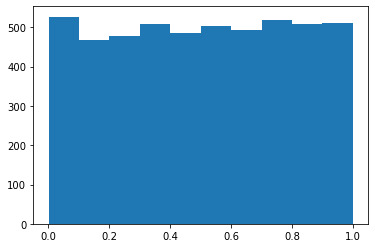

In [14]:
uniform_dist = np.random.uniform(0, 1, size=5000)
plt.hist(uniform_dist)

Сгенерируем большое количество выборок из этого распределения, возьмем для каждой из них среднее и из средних построим гистограмму.

Какое распределение напоминает?

**Теорема утверждает**, что с увеличением размера выборки распределение среднего значения по нескольким выборкам будет приближаться к стандартному нормальному распределению.

(array([ 18.,  39.,  73.,  75., 111., 107., 132., 143., 186., 215., 222.,
        268., 258., 257., 337., 315., 301., 282., 285., 216., 218., 189.,
        161., 142., 114., 100.,  98.,  67.,  50.,  21.]),
 array([0.00887826, 0.04147939, 0.07408052, 0.10668165, 0.13928277,
        0.1718839 , 0.20448503, 0.23708616, 0.26968729, 0.30228841,
        0.33488954, 0.36749067, 0.4000918 , 0.43269293, 0.46529405,
        0.49789518, 0.53049631, 0.56309744, 0.59569857, 0.62829969,
        0.66090082, 0.69350195, 0.72610308, 0.75870421, 0.79130533,
        0.82390646, 0.85650759, 0.88910872, 0.92170985, 0.95431097,
        0.9869121 ]),
 <BarContainer object of 30 artists>)

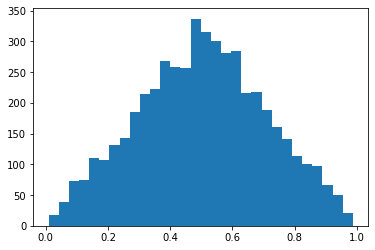

In [15]:
n = 2
sample = np.random.uniform(0, 1, size=(5000, n))
mean = sample.mean(axis=1)
plt.hist(mean, bins=30)

### Задача
Для бета-распределения с параметрами a=1 и b=0.1, найти , для которого распределение средних значений выборок будет похоже на нормальное.

Бета-распределение генерируется функцией np.random.beta(a, b)

In [25]:
# Ваш код здесь

### Доверительные интервалы
Иногда мы хотим не только оценить среднее выборки, но и понять в каком интервале это значение может меняться с заданным уровнем значимости.

Например, мы знаем историю по продажам магазина за год и хотим узнать сколько в среднем продаж в месяц совершает магазин.

Помимо самого числа нам хотелось бы знать с вероятностью, например, 95%, в каком интервале может меняться это значение.

В этом нам поможет центральная предельная теорема.

Мы уже знаем, что если брать из генеральной совокупности выборки размера n, то выборочное среднее всех этих выборок будет распределяться по нормальному закону. 

Мы так же знаем, что 95% всех наблюдений будут лежать в диапазоне +-1.96 $\sigma$ по правилу трех сигм

Выборки разного размера могут дают разные оценки параметров генеральной совокупности. Для характеристики точности выборочных оценок используют **стандартную ошибку среднего**

Стандартная ошибка среднего вычисляется по формуле

$$\text{SE}_{\bar {x}}\ ={\frac {\sigma }{\sqrt {n}}}$$

Внимание! Стандартная ошибка среднего не является характеристикой разброса значений. Стандартная ошибка среднего лишь говорит о том, как точно мы оцениваем среднее генеральной совокупности по выборке. Чем больше выборка, тем меньше это значение

Доверительный интервал расчитывается по формуле:

$$(\bar{x} - 1.96 SE_{\bar{x}} ; \bar{x} + 1.96 SE_{\bar{x}})$$

если у кого-то возник вопрос, почему 1,96 и 2,58, то простой ответ - из таблиц. Нет, 1,96 это не просто "недоокругленные" 2 сигмы, и 2,58 это не "недоокругленные" 3 сигмы. Т.е. надо запомнить:
1. для расчета 95% доверительного интервала используйте 1,96,
2. для расчета 99% доверительного интервала используйте 2,58.

In [32]:
mean = 100
std = 10 # Настоящее среднеквадратичное отклонение, но представим, что мы его посчитали из данных
alpha = 0.05
n = 12

### Вариант 1. Настоящая дисперсия известна
Настоящая дисперсия может быть известна, если мы проверили статистическую гипотезу и доказали это.

Оценка получится довольно точной

In [34]:
from scipy.stats import norm

def get_confidence_interval(mean, std, n, alpha):
    h = norm.ppf(1 - alpha / 2) * std / np.sqrt(n)
    return mean - h, mean + h

confidence_interval = get_confidence_interval(mean, std, n, alpha)

confidence_interval

(94.34207132961915, 105.65792867038085)

### Вариант 2. Настоящая дисперсия неизвестна
Здесь std - среднеквадратичное отклонение, которое мы могли посчитать по данным

Оценка получится менее точной

In [33]:
from scipy.stats import t

t.interval(1 - alpha, n - 1, loc=mean, scale=std / np.sqrt(n))

(93.64630312671869, 106.35369687328131)

В этом случае мы используем T-распределение Стьюдента, которое похоже на нормальное распределение.

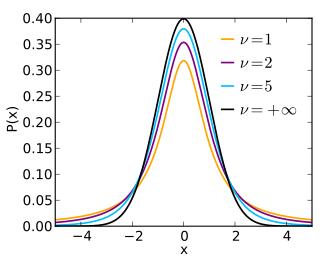

На картинке параметр  - количество степеней свободы распределения. Если устремим к бесконечности, то получим нормальное распределение.

## Проверка гипотез

Алгоритм проверки статистических гипотез:

1. Формулируем гипотезы H0 и H1
2. Выбираем уровень значимости
3. Определяем статистический критерий
4. Рассчитываем критерий
5. Принимаем решение


Цель тестирования состоит в том, чтобы выяснить, может ли наблюдаемый эффект вызываться случайно.

### Шаг 1. Формулируем гипотезы

Обычно формулируются две взаимоисключающие гипотезы. 

Гипотеза $H_0$ принимается за базовую (как было до нашего вмешательства, например). Альтернативная гипотеза $H_1$ показывает то, чего мы хотим достичь или что хотим доказать. 

Основные статистические тесты придумали до нас, нам остается только их правильно применить и не допустить ошибок в интерпретации.

Например:

- $H_0$: матожидание величины $F$ равно $a$
- $H_1$: матожидание не равно $a$/больше $a$/меньше $a$

Или:

- $H_0$: Распределение $G$ - нормальное
- $H_1$: Распределение принадлежит другому классу

Или:

- $H_0$: изменение цвета кнопки не повлияло на действия пользователя
- $H_1$: изменение цвета кнопки изменило количество кликов по ней

Или:

- $H_0$: новое лекарство не влияет на выздоровление пациентов
- $H_1$: с новым лекарством люди выздоравливают от болезни $X$ быстрее

Гипотезы бывают односторонними и двусторонними. 

Двусторонние гипотезы более широко распространены в статистике, поскольку, как правило, необходимо обнаружить различия любой направленности.

Нулевая гипотеза — утверждение, что ничего особенного не произошло, и любой эффект, который наблюдается, происходит в силу случайности.

Тестирование гипотезы предполагает, что нулевая гипотеза является истинной и проверяет, является ли наблюдаемый эффект разумным результатом.

После сбора данных и вычисления статистик можно принять одно из двух решений:
- отвергнуть нулевую гипотезу;
- не отвергнуть нулевую гипотезу.

Не отвержение нулевой гипотезы не означает ее справедливости.

### Шаг 2. Выбираем уровень значимости

Насколько мы хотим быть уверены в результатах теста?

Обычно берут уровень значимости 0.05, и это некий стандарт (вам поверят, что ваш метод работает), но для каждой задачи надо выбирать свой уровень значимости. 

#### P-значение

P-значение (англ. P-value), p-уровень значимости, p-критерий — вероятность получить для данной вероятностной модели распределения значений случайной величины такое же или более экстремальное значение статистики (среднего арифметического, медианы и др.), по сравнению с ранее наблюдаемым, при условии, что нулевая гипотеза верна.

### Ошибки I и II рода
Существует два типа ошибок - ошибки первого и второго рода.

Уровень значимости - вероятность не допустить ошибку первого рода

Какую ошибку "можно" допустить, а какую нельзя?


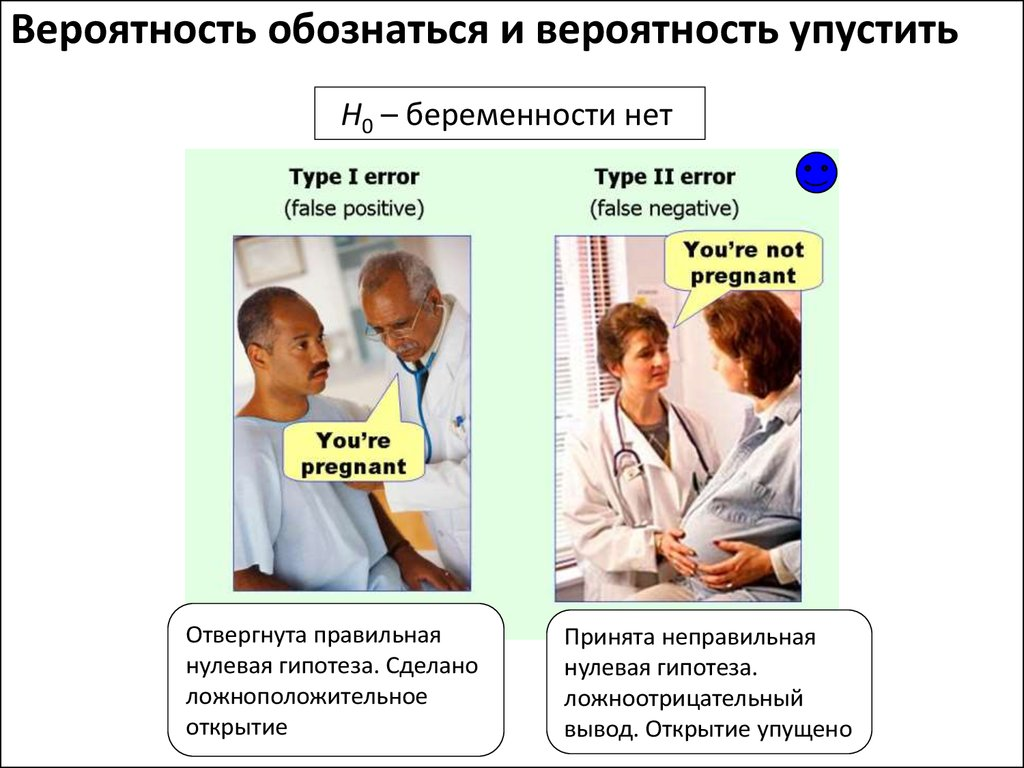

### Задача
Человечество изобрело лекарство от рака! Клинические тесты показали, что оно действует с уровнем значимости 0.05, но у лекарства оказались очень плохие побочные эффекты.

Первая партия лекарства составила 50 млн ампул.

Сколько людей можно было бы спасти, если бы проводимый тест был с уровнем значимости 0.01?

In [35]:
# Ваш код здесь

### Шаг 3. Определяем статистический критерий
Существует множество статистических критериев, которые позволяют каким-то образом оценить по данным эксперимента его результат.

Критерий выбирается от задачи, их существует большое множество, [на википедии можно посмотреть самые основные](https://ru.wikipedia.org/wiki/Статистический_критерий)

Скорее всего, нужный вам критерий есть в scipy.

Если в scipy нет нужного критерия, то он есть в другой python-библиотеке

### Шаг 4. Рассчитываем критерий
Находим критическую область, находим значение статистического критерия для наших данных

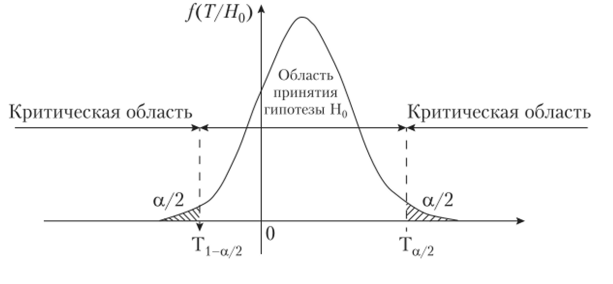

### Задача
Реализовать функцию для подсчета одновыборочного t-критерия Стьюдента

$$T = \frac{\text{mean} - a_0}{\sigma / \sqrt{df}}$$

$df$ - количество степеней свободы и равно $n - 1$

In [ ]:
def t_stat(sample_mean, a0, std, df):
    # Ваш код здесь
    pass

### Шаг 5. Принимаем решение

Если значение критерий входит в критическую область, отклоняем гипотезу $H_0$ и принимаем $H_1$.

Если лежит не в критической области, то не можем отклонить $H_0$

## Пример

Дана выборка с ростом людей. Известно, что рост людей (генеральной совокупности) распределен нормально. Проверить, равен ли средний рост людей 170 с уровнем значимости 0.05.

Применим [t-критерий Стьюдента](https://ru.wikipedia.org/wiki/T-%D0%BA%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%A1%D1%82%D1%8C%D1%8E%D0%B4%D0%B5%D0%BD%D1%82%D0%B0).

$H_0: a = a_0$

$H_1: a \neq a_0 $

In [36]:
n = 100
alpha = 0.05
real_e = 170
real_d = 10
a0 = 170
sample = np.random.normal(real_e, real_d, size=n)

In [38]:
# считаем статистику по данным
statistic = t_stat(sample.mean(), a0, sample.std(), n - 1)

# критическая область считается для распределения стьюдента
critical_value = t.ppf(1 - alpha / 2, n - 1)

if abs(statistic) < critical_value:
    print('H0 справедлива')
else:
    print('H1 справедлива')

NameError: name 't_stat' is not defined

In [39]:
p0 = t.cdf(statistic, n - 1) # Левосторонняя альтернатива
p1 = 1 - t.cdf(statistic, n - 1) # Правосторонняя альтернатива
p_value = 2 * min(p0, p1) # Двусторонняя альтернатива
p_value

NameError: name 'statistic' is not defined

Проделаем тоже самое с помощью scipy

In [40]:
result = scipy.stats.ttest_1samp(sample, 170)
result

Ttest_1sampResult(statistic=0.6404266440703537, pvalue=0.5233748179184661)

In [ ]:
result.statistic, result.pvalue

## Задача

Сгенерировать две выборки роста людей с одинаковыми дисперсиями и разными матожиданиями (из нормального распределения). 

Опровергнуть гипотезу $H_0$ о том, что матожидания этих распределений равны.

Для решения можно использовать `scipy.stats.ttest_ind`.

Важно: тест работает только для распределений с равными дисперсиями. Можно поставить разные дисперсии и одинаковые матожидания и посмотреть на результаты.

## Проверка на нормальность
Проверить распределение на нормальность можно многими способами. Например, при помощи статистических тестов (их существует очень много, но чаще всего используют критерий Шапиро)

Также используют QQ-график (qq plot). Это неформальный тест, но очень наглядный. Если график похож на линию  𝑦=𝑥 , то выборка из нормального распределение. Если график не похож на прямую линию, то распределение не нормальное.

## Задача
Взять данные о погоде (../data/weather.csv), построить гистограмму первых разностей. Похоже ли распределение на нормальное?

Проверить на нормальность распределение первых разностей температуры.

Использовать уровень значимости 0.05. Использовать критерий Шапиро для проверки на нормальность. Функцию найти в интернете

Построить qq plot

Проверить на нормальность с помощью теста Шапиро-Уилка

In [41]:
# Ваш код здесь

## Полезные ссылки
- [Первая часть статистики на stepic](https://stepik.org/course/76/)
- [Вторая часть статистики на stepic](https://stepik.org/course/524/)
- [Третья часть статистики на stepic](https://stepik.org/course/2152/syllabus)
- [Книга "Статистика и Котики"](http://info.levandovskiy.info/wp-content/uploads/2018/10/Statistika_i_kotiki.pdf)
- [Книга "Как лгать при помощи статистики"](https://baguzin.ru/wp/wp-content/uploads/2015/09/Дарелл-Хафф.-Как-лгать-при-помощи-статистики.pdf)

# Домашняя работа

Для задач Easy и Normal использовать данные Титаника

## Easy

Оценить с помощью доверительных интервалов:
- выживаемость всех пассажиров (оценить среднее по isSurvived)
- выживаемость женщин
- выживаемость людей с каютами первого класса

Ответить на вопросы:
- какой вариант оценки доверительных интервалов нужно использовать в данной задаче и почему?
- какая из ошибок более критична для данной задачи - I или II рода?

## Normal

- Проверить гипотезу о том, что женщины выживают чаще мужчин с уровнем значимости 0.05
- Проверить гипотезу о том, что дети выживают чаще, чем взрослые

## Hard

Одной из важнейших тем в статистике является множественная проверка гипотез. 

Если нужно много раз проверять гипотезы, то вероятность совершить ошибку первого рода будет расти с каждой новой гипотезой.

[Прочитать подробнее можно здесь](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BF%D1%80%D0%B0%D0%B2%D0%BA%D0%B0_%D0%BD%D0%B0_%D0%BC%D0%BD%D0%BE%D0%B6%D0%B5%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D1%83%D1%8E_%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D1%83_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7)

Задача:

Мы отобрали 1000 человек, которые заявляют, что они экстрасенсы. Мы хотим проверить это. Для этого проводится следующий эксперимент. Перед каждым участником выкладывают 10 карт рубашкой вверх и просят угадать цвет карты (красный или черный). На уровне значимости 0.01 мы хотим быть уверены, является ли человек экстрасенсом.

Нужно смоделировать ситуацию двумя способами (предполагаем, что экстрасенсов не существует и решения участников представляют из себя биномиальное распределение):

- без множественной проверки гипотез, выявить количество экстрасенсов
- с множественной проверкой гипотез, используя поправку Бонферрони (правило FWER)

Сколько экстрасенсов получилось поймать в каждом из случаев?
